# Random Forest Model 

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Data

### Load the Dataset

In [2]:
df = pd.read_csv('Preprocessing_pipeline/combined_data.csv')

### Shape of the dataset now


In [3]:
print("Shape of the data set: ", df.shape)

Shape of the data set:  (480, 25)


### Plot number of people for each target

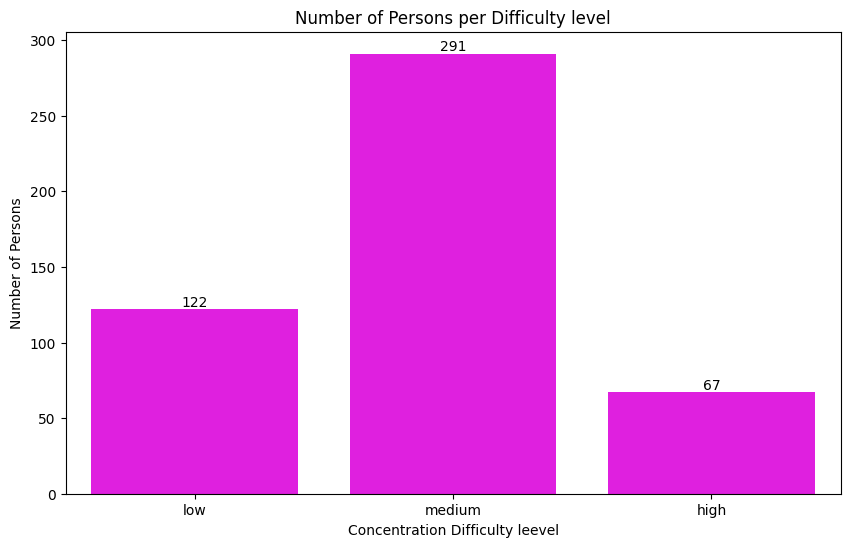

In [4]:
# Step 1: Count the occurrences of each category in the 'Sex' column
difficulty_levels = df['Difficulty_level'].value_counts().sort_index()

# Step 2: Create a mapping for category labels
category_labels = {
    0: 'low',
    1: 'medium',
    2: 'high',
}

# Step 3: Map the numerical values to category names for the x-axis labels
difficulty_levels.index = difficulty_levels.index.map(category_labels)

# Step 4: Plot the bar chart with a proper figure size
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=difficulty_levels.index, y=difficulty_levels.values, color='magenta')

# Step 5: Add annotations on top of the bars
for index, value in enumerate(difficulty_levels.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

# Step 6: Set the labels and title
plt.xlabel('Concentration Difficulty leevel')
plt.ylabel('Number of Persons')
plt.title('Number of Persons per Difficulty level')

# Step 7: Show the plot
plt.show()

### Features


In [5]:
# Initialize lists to hold the table data
feature_index = []
feature_name = []
categories = []
num_categories = []

# Iterate over each column to extract the required information
for idx, col in enumerate(df.columns):
    
    unique_categories = df[col].unique()
    feature_index.append(idx)
    feature_name.append(col)
    # if col == 'Platforms Used':
    #     categories.append(", ".join(map(str, social_media_platforms)))
    # else:
    categories.append(", ".join(map(str, unique_categories)))
    # if col == 'Platforms Used':
    #     num_categories.append(len(social_media_platforms))
    # else:
    num_categories.append(len(unique_categories))

# Create the resulting DataFrame
table_for_num_of_categories_2 = pd.DataFrame({
    'Feature Index': feature_index,
    'Feature': feature_name,
    'Categories': categories,
    'Number of Categories': num_categories
})

# Display the DataFrame using the display function
from IPython.display import display

# Set the maximum width of the display to make it horizontally scrollable
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

# Set the maximum column width to display all data in each cell
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(table_for_num_of_categories_2)

,Feature Index,Feature,Categories,Number of Categories
0,0,Age,"24, 46, 30, 56, 19, 21, 47, 23, 20, 25, 26, 65, 52, 35, 22, 44, 17, 60, 34, 48, 27, 36, 29, 32, 18, 42, 31, 50, 37, 69, 28, 14, 16, 43, 38, 40, 91, 51, 49, 15, 55, 13, 33, 53, 45",45
1,1,Sex,"0, 1, 2",3
2,2,Relationship Status,"1, 2, 0, 3",4
3,3,Occupation,"2, 3, 1, 0",4
4,4,Social Media User?,"1, 0",2
5,5,Time Spent,"2, 0, 4, 1, 5, 3",6
6,6,Q1,"3, 2, 1, 4, 5",5
7,7,Q2,"3, 1, 4, 5, 2",5
8,8,Q3,"2, 1, 4, 3, 5",5
9,9,Q4,"2, 1, 3, 4, 5",5


### Number of features I will have after one-hot encoding

In [6]:
print("Number of features after one-hot encoding: ", sum(num_categories) - num_categories[0] + 1 - 11)
# -num_categories[0] + 1 : Because age is a continuous variable

Number of features after one-hot encoding:  72


## 2. One-hot encoding

### Define the variables for one-hot encode

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  480 non-null    int64
 1   Sex                  480 non-null    int64
 2   Relationship Status  480 non-null    int64
 3   Occupation           480 non-null    int64
 4   Social Media User?   480 non-null    int64
 5   Time Spent           480 non-null    int64
 6   Q1                   480 non-null    int64
 7   Q2                   480 non-null    int64
 8   Q3                   480 non-null    int64
 9   Q4                   480 non-null    int64
 10  Q5                   480 non-null    int64
 11  Q6                   480 non-null    int64
 12  Q7                   480 non-null    int64
 13  Q8                   480 non-null    int64
 14  Difficulty_level     480 non-null    int64
 15  Facebook             480 non-null    int64
 16  Instagram            480 n

In [8]:
cat_variables = ['Sex', 'Relationship Status', 'Occupation', 'Time Spent', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']    
print(cat_variables)

['Sex', 'Relationship Status', 'Occupation', 'Time Spent', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']


### Apply pandas pd.get_dummies function to one-hot encode

- data: data frame(data)
- prefix: A list of prefixes(cat_variables)
- columns: A list of columns that will be one hot encoded(cat_variables)

In [9]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
features = pd.get_dummies(data = df, prefix=cat_variables, columns=cat_variables)

features.head()

# How many coluns now
print("Number of columns after one-hot encoding before encode 'platforms used?': ", len(features.columns))

Number of columns after one-hot encoding before encode 'platforms used?':  70


In [10]:
features.head()

,Age,Social Media User?,Difficulty_level,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,is_train,Sex_0,Sex_1,Sex_2,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5
0,24,1,0,1,1,1,0,1,0,0,0,0,1,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,46,1,0,1,0,1,0,0,0,0,0,0,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,30,1,1,1,1,0,0,0,0,0,0,0,1,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,56,1,0,0,0,1,0,0,0,0,0,0,1,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,19,1,1,1,1,1,0,0,0,0,0,1,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False


### Make Every feature True or False

In [11]:
# Convert 'Yes' to True and 'No' to False
features['Social Media User?'] = features['Social Media User?'].replace({1: True, 0: False})
features['Facebook'] = features['Facebook'].replace({1: True, 0: False})
features['Instagram'] = features['Instagram'].replace({1: True, 0: False})
features['YouTube'] = features['YouTube'].replace({1: True, 0: False})
features['Snapchat'] = features['Snapchat'].replace({1: True, 0: False})
features['Twitter'] = features['Twitter'].replace({1: True, 0: False})
features['Discord'] = features['Discord'].replace({1: True, 0: False})
features['Reddit'] = features['Reddit'].replace({1: True, 0: False})
features['Pinterest'] = features['Pinterest'].replace({1: True, 0: False})
features['TikTok'] = features['TikTok'].replace({1: True, 0: False})
features.head()

/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_84644/149385090.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['Social Media User?'] = features['Social Media User?'].replace({1: True, 0: False})
/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_84644/149385090.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['Facebook'] = features['Facebook'].replace({1: True, 0: False})
/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_84644/149385090.py:4: FutureWarning: Downcasting behavior

,Age,Social Media User?,Difficulty_level,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,is_train,Sex_0,Sex_1,Sex_2,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5
0,24,True,0,True,True,True,False,True,False,False,False,False,1,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,46,True,0,True,False,True,False,False,False,False,False,False,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,30,True,1,True,True,False,False,False,False,False,False,False,1,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,56,True,0,False,False,True,False,False,False,False,False,False,1,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,19,True,1,True,True,True,False,False,False,False,False,True,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False


### Removing target from the features

In [12]:
features.drop('Difficulty_level', axis=1, inplace=True)
print(features.shape)

(480, 69)


### Table to clarify every feature is a binary variable other than "Age"


In [13]:
# Initialize lists to hold the table data
feature_index_new = []
feature_name_new = []
categories_new = []
num_categories_new = []

# Iterate over each column to extract the required information
for idx, col in enumerate(features.columns):
    
    unique_categories = features[col].unique()
    feature_index_new.append(idx)
    feature_name_new.append(col)
    # if col == 'Platforms Used':
    #     categories_new.append(", ".join(map(str, social_media_platforms)))
    # else:
    categories_new.append(", ".join(map(str, unique_categories)))
    # if col == 'Platforms Used':
    #     num_categories_new.append(len(social_media_platforms))
    #else:
    num_categories_new.append(len(unique_categories))

# Create the resulting DataFrame
table_for_num_of_categories_new = pd.DataFrame({
    'Feature Index': feature_index_new,
    'Feature': feature_name_new,
    'Categories': categories_new,
    'Number of Categories': num_categories_new
})

# Display the DataFrame using the display function
from IPython.display import display

# Set the maximum width of the display to make it horizontally scrollable
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

# Set the maximum column width to display all data in each cell
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(table_for_num_of_categories_new)

,Feature Index,Feature,Categories,Number of Categories
0,0,Age,"24, 46, 30, 56, 19, 21, 47, 23, 20, 25, 26, 65, 52, 35, 22, 44, 17, 60, 34, 48, 27, 36, 29, 32, 18, 42, 31, 50, 37, 69, 28, 14, 16, 43, 38, 40, 91, 51, 49, 15, 55, 13, 33, 53, 45",45
1,1,Social Media User?,"True, False",2
2,2,Facebook,"True, False",2
3,3,Instagram,"True, False",2
4,4,YouTube,"True, False",2
5,5,Snapchat,"False, True",2
6,6,Twitter,"True, False",2
7,7,Discord,"False, True",2
8,8,Reddit,"False, True",2
9,9,Pinterest,"False, True",2


### Number of features after one-hot encoded

In [14]:
print("Number of columns after one-hot encoded: ", len(features.columns))

# Feature
features.head() 

# For check the data frame still preserved
#data.head()

Number of columns after one-hot encoded:  69


,Age,Social Media User?,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,is_train,Sex_0,Sex_1,Sex_2,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5
0,24,True,True,True,True,False,True,False,False,False,False,1,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,46,True,True,False,True,False,False,False,False,False,False,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,30,True,True,True,False,False,False,False,False,False,False,1,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,56,True,False,False,True,False,False,False,False,False,False,1,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,19,True,True,True,True,False,False,False,False,False,True,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False


## 3. Making train and test sets

In [15]:
RANDOM_STATE = 55

X_train = features.iloc[0: 384]
X_test = features.iloc[384: 480].reset_index(drop=True)
y_train = df['Difficulty_level'].iloc[0: 384]
y_test = df['Difficulty_level'].iloc[384: 480].reset_index(drop=True)

# Checking
print(X_train.iloc[382]['is_train'])
print(X_train.iloc[383]['is_train'])
print(X_test.iloc[0]['is_train'])
print(X_test.iloc[1]['is_train'])

1
1
0
0


In [16]:
# printing number of samples in each set
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')

train samples: 384
validation samples: 96


### Drop is_train column

In [17]:
X_train.drop('is_train', axis=1, inplace=True)
X_test.drop('is_train', axis=1, inplace=True)

X_train.drop(['Sex_0', 'Sex_1', 'Sex_2'], axis=1, inplace=True)
X_test.drop(['Sex_0', 'Sex_1', 'Sex_2'], axis=1, inplace=True)

X_train.drop(['Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', "Q8_5"], axis=1, inplace=True)
X_test.drop(['Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', "Q8_5"], axis=1, inplace=True)

# Checking
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 60)
(96, 60)
(384,)
(96,)


/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_84644/3096698218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('is_train', axis=1, inplace=True)
/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_84644/3096698218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['Sex_0', 'Sex_1', 'Sex_2'], axis=1, inplace=True)
/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_84644/3096698218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

## 4. Building the Models



## 4.1 Decision Tree

In [18]:
from sklearn.metrics import accuracy_score

### Hyperparameters of DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

print("Number of hyperparameters in DecisionTreeClassifier: ", len(DecisionTreeClassifier().get_params()))
for item in (DecisionTreeClassifier().get_params()):
    print(item)

Number of hyperparameters in DecisionTreeClassifier:  13
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
monotonic_cst
random_state
splitter


### Initial hyperparameters going to use

- min_samples_split: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
- max_depth: The maximum depth of the tree. 
  - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [20]:
min_samples_split_list = [ 2, 5, 10, 20, 50, 60, 80, 100]
max_depth_list = [ 2, 5, 10, 20, 40, 80, 100, 200] 

### Function for plot graphs

    

In [57]:
def plot_graphs(accuracy_list_train, accuracy_list_test, hyperparameter_list, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    plt.plot(hyperparameter_list, accuracy_list_train, marker='o', label='On training set')
    plt.plot(hyperparameter_list, accuracy_list_test, marker='o', label='On test set')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=hyperparameter_list)

    # Find the maximum accuracy and corresponding min_samples_split value for both curves
    max_accuracy_train = max(accuracy_list_train)
    max_accuracy_train_index = accuracy_list_train.index(max_accuracy_train)
    max_accuracy_train_value = hyperparameter_list[max_accuracy_train_index]

    max_accuracy_test = max(accuracy_list_test)
    max_accuracy_test_index = accuracy_list_test.index(max_accuracy_test)
    max_accuracy_test_value = hyperparameter_list[max_accuracy_test_index]

    # Highlight and annotate the highest points on the training set curve
    plt.scatter(max_accuracy_train_value, max_accuracy_train, color='blue')
    plt.annotate(f'{max_accuracy_train_value}, {max_accuracy_train:.2f}', 
                xy=(max_accuracy_train_value, max_accuracy_train), 
                xytext=(max_accuracy_train_value, max_accuracy_train + 0.03),
                ha='center', color='blue',
                arrowprops=dict(facecolor='blue', shrink=0.05))

    # Highlight and annotate the highest points on the test set curve
    plt.scatter(max_accuracy_test_value, max_accuracy_test, color='orange', zorder=5)
    plt.annotate(f'{max_accuracy_test_value}, {max_accuracy_test:.2f}', 
                xy=(max_accuracy_test_value, max_accuracy_test), 
                xytext=(max_accuracy_test_value, max_accuracy_test + 0.03),
                ha='center', color='orange',
                arrowprops=dict(facecolor='orange', shrink=0.05))

    # Rotate x-tick labels for better readability
    plt.xticks(rotation=45)

    # Show the legend and plot
    plt.legend()
    plt.show()

### By changing the minimum samples to split

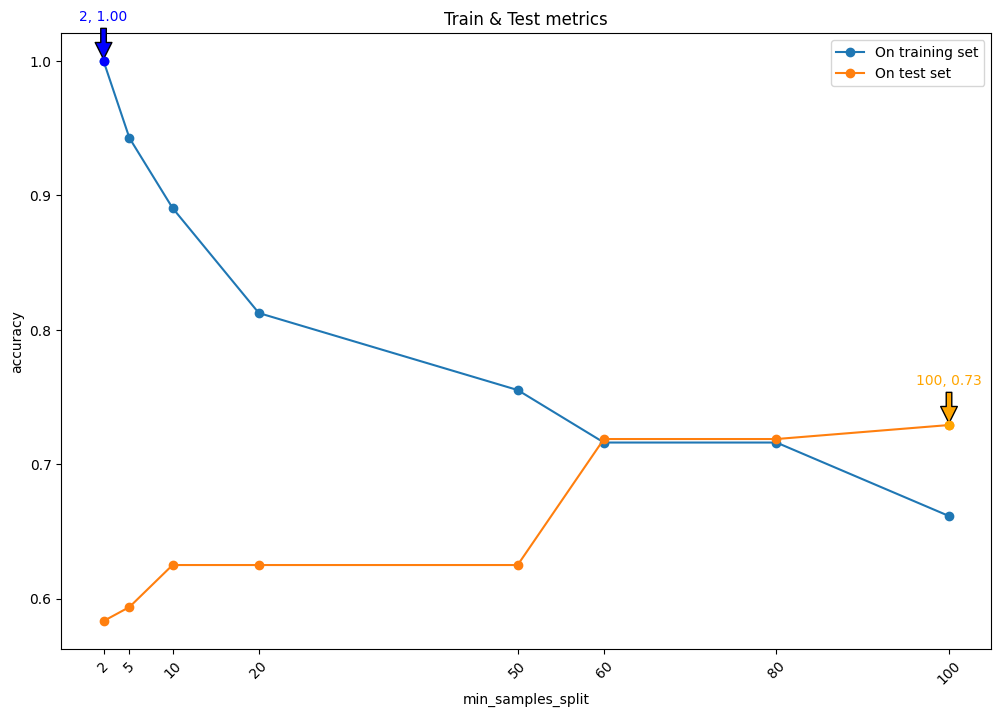

In [22]:
accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, min_samples_split_list[:], 'Train & Test metrics', 'min_samples_split', 'accuracy', )

### By changing the maximum depth

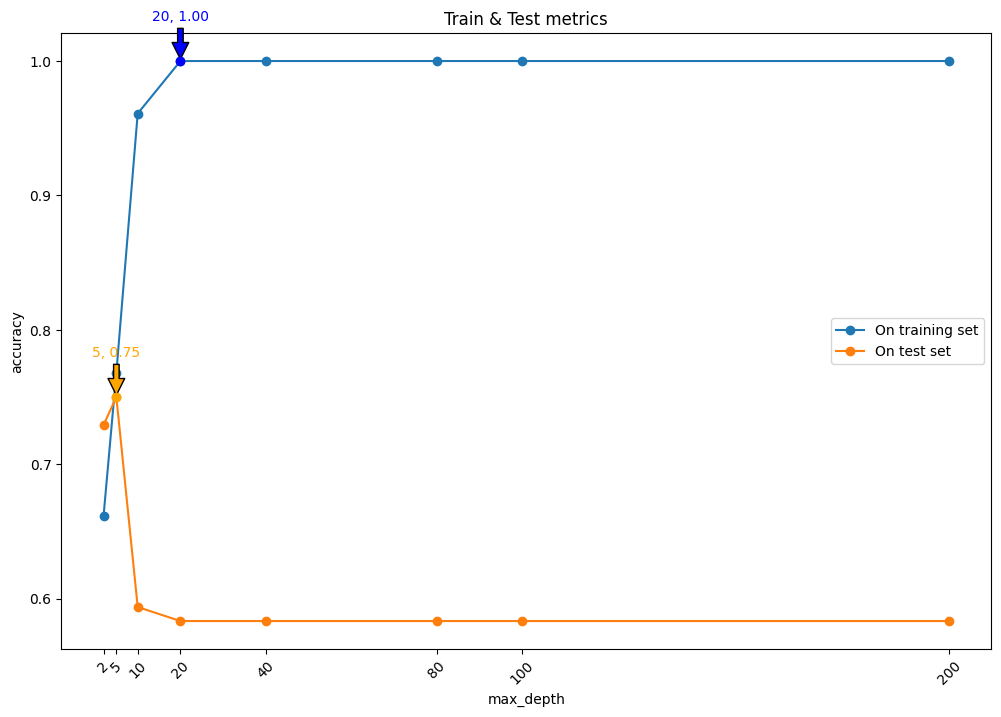

In [23]:
accuracy_list_train = []
accuracy_list_test = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth= max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, max_depth_list, 'Train & Test metrics', 'max_depth', 'accuracy', )

### To try all the combinations using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 50, 60, 80, 100],
    'max_depth': [2, 5, 10, 20, 40, 80, 100, 200]
}

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=53, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: {best_params}")

Best accuracy: 0.7075471698113206
Best parameters: {'max_depth': 5, 'min_samples_split': 50}


### Use values for "max_depth" and "min_samples_split" which gave the best results for the test set

- max_depth = 5
- min_samples_split = 5

In [25]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 5,

                                             ).fit(X_train,y_train)


In [26]:
training_accuracy_score_decision_tree = accuracy_score(decision_tree_model.predict(X_train),y_train)
testing_accuracy_score_decision_tree = accuracy_score(decision_tree_model.predict(X_test),y_test)
print(f"Training Accuracy score: {training_accuracy_score_decision_tree:.4f}")
print(f"Testing Accuracy score: {testing_accuracy_score_decision_tree:.4f}")

Training Accuracy score: 0.7370
Testing Accuracy score: 0.7396


## 4.2 Random Forest

### Hyperparameters of random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

print("Number of hyperparameters in RandomForestClassifier: ", len(RandomForestClassifier().get_params()))
for item in (RandomForestClassifier().get_params()):
    print(item)

Number of hyperparameters in RandomForestClassifier:  19
bootstrap
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
monotonic_cst
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


### Initial hyperparameters going to use

- min_samples_split: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
- max_depth: The maximum depth of the tree. 
  - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.
- max_festures: maximum number of trees for an induvidual tree
  - Remember that for a Random Forest, we randomly choose a subset of the features AND randomly choose a subset of the training examples to train each individual tree.
- n_estimators: Number of decision trees make up the forest

In [73]:
min_samples_split_list = [i for i in range(2, 101)]
max_depth_list = [i for i in range(2, 101)] 
n_estimators_list = [i for i in range(2, 101)]

### By changing the min_samples_split

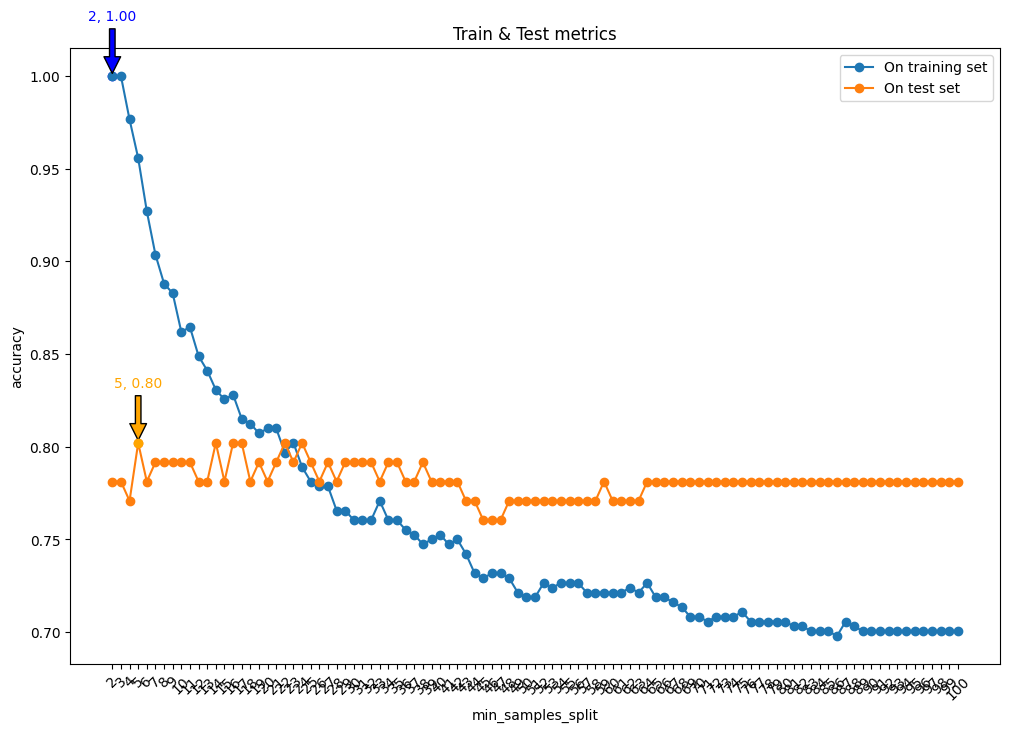

In [70]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train,) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, min_samples_split_list[:], 'Train & Test metrics', 'min_samples_split', 'accuracy', )

### By changing the maximum_deth

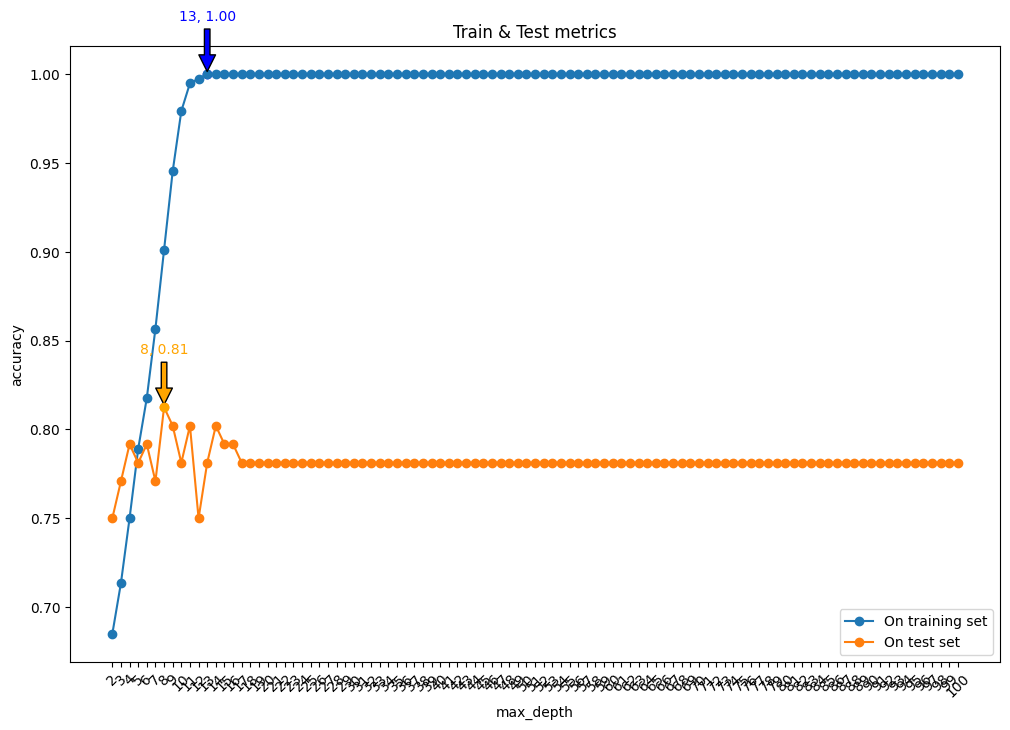

In [58]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, max_depth_list, 'Train & Test metrics', 'max_depth', 'accuracy', )

### By Changing n_estimator

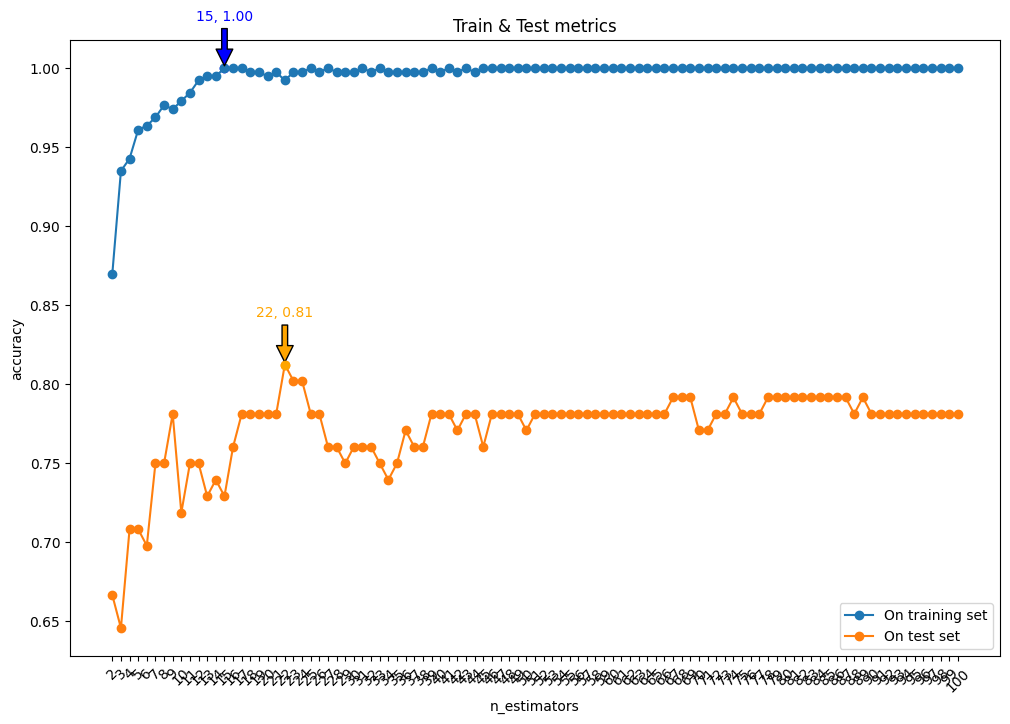

In [74]:
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, n_estimators_list, 'Train & Test metrics', 'n_estimators', 'accuracy', )

### Try all the combinations using GridSearchCV

In [92]:
# Define the parameter grid
param_grid = {
    'min_samples_split': [i for i in range(2, 11)],
    'max_depth': [i for i in range(3, 14)],
    'n_estimators': [i for i in range(15, 26)],
}

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=RANDOM_STATE)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: {best_params}")

Best accuracy: 0.75
Best parameters: {'max_depth': 10, 'min_samples_split': 7, 'n_estimators': 19}


### Use values for "max_depth", "min_samples_split", "n_estimators" which gave the best results for the test set

- max_depth = 10
- min_samples_split = 7
- n_estimators = 20

In [93]:
random_forest_model = RandomForestClassifier(n_estimators = 19,
                                             max_depth = 10, 
                                             min_samples_split = 7, 
                                             criterion='entropy',
                                             max_features='log2',
                                             
                                             warm_start=True,
                                             ).fit(X_train,y_train)

In [94]:
training_accuracy_score_random_forest = accuracy_score(random_forest_model.predict(X_train),y_train)
testing_accuracy_score_random_forest = accuracy_score(random_forest_model.predict(X_test),y_test)
print(f"Training Accuracy score: {training_accuracy_score_random_forest:.4f}")
print(f"Testing Accuracy score: {testing_accuracy_score_random_forest:.4f}")

Training Accuracy score: 0.8620
Testing Accuracy score: 0.7812


## 4.3 XGoost


### Hyperparameters of XGBoost

In [35]:
from xgboost import XGBClassifier

print("Number of hyperparameters in RandomForestClassifier: ", len(XGBClassifier().get_params()))
for item in (XGBClassifier().get_params()):
    print(item)

Number of hyperparameters in RandomForestClassifier:  39
objective
base_score
booster
callbacks
colsample_bylevel
colsample_bynode
colsample_bytree
device
early_stopping_rounds
enable_categorical
eval_metric
feature_types
gamma
grow_policy
importance_type
interaction_constraints
learning_rate
max_bin
max_cat_threshold
max_cat_to_onehot
max_delta_step
max_depth
max_leaves
min_child_weight
missing
monotone_constraints
multi_strategy
n_estimators
n_jobs
num_parallel_tree
random_state
reg_alpha
reg_lambda
sampling_method
scale_pos_weight
subsample
tree_method
validate_parameters
verbosity


### One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form `(X_val,y_val)`.

### For XGBoost numerical values are needed for the test set

In [36]:
# # Function to convert Difficulty_levels to numerical values
# def target_to_numeric(target):
#     if target in 'low':
#         return 0
#     elif target is 'medium':
#         return 1
#     elif target is 'high':
#         return 2
#     else:
#         return None

# # Apply the function to the Difficulty_level column and create the new Difficulty_level_integer column
# data['Difficulty_level_integer'] = data['Difficulty_level'].apply(target_to_numeric)

# # Display the DataFrame
# #data.head(40)

In [37]:
# Importing the XGBClassifier
from xgboost import XGBClassifier

# Define training and test sets again 
#X_train, X_test, y_train, y_test = train_test_split(features, data['Difficulty_level_integer'], train_size=0.8, random_state=RANDOM_STATE)  # 80% training and 20% testing

n = int(len(X_train)*0.8) ## Use 80% of training data to train and 20% to eval

# Set traing and evaluation sets for training data
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

# Set early_stopping_rounds to 10 to avoid overfitting
xgb_model = XGBClassifier(n_estimators = 1000, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

# To see the round with lowest evaluation metric
xgb_model.best_iteration

training_accuracy_score_xgboost = accuracy_score(xgb_model.predict(X_train),y_train)
testing_accuracy_score_xgboost = accuracy_score(xgb_model.predict(X_test),y_test)
print(f"Training Accuracy score: {training_accuracy_score_xgboost:.4f}")
print(f"Testing Accuracy score: {testing_accuracy_score_xgboost:.4f}")

[0]	validation_0-mlogloss:1.03923
[1]	validation_0-mlogloss:0.98618
[2]	validation_0-mlogloss:0.94332
[3]	validation_0-mlogloss:0.90852
[4]	validation_0-mlogloss:0.88501
[5]	validation_0-mlogloss:0.85699
[6]	validation_0-mlogloss:0.83005
[7]	validation_0-mlogloss:0.81012
[8]	validation_0-mlogloss:0.79473
[9]	validation_0-mlogloss:0.77977
[10]	validation_0-mlogloss:0.76856
[11]	validation_0-mlogloss:0.75624
[12]	validation_0-mlogloss:0.74603
[13]	validation_0-mlogloss:0.73675
[14]	validation_0-mlogloss:0.72816
[15]	validation_0-mlogloss:0.72082
[16]	validation_0-mlogloss:0.71393
[17]	validation_0-mlogloss:0.70446
[18]	validation_0-mlogloss:0.69942
[19]	validation_0-mlogloss:0.69244
[20]	validation_0-mlogloss:0.68939
[21]	validation_0-mlogloss:0.68608
[22]	validation_0-mlogloss:0.68416
[23]	validation_0-mlogloss:0.68469
[24]	validation_0-mlogloss:0.68037
[25]	validation_0-mlogloss:0.67915
[26]	validation_0-mlogloss:0.67871
[27]	validation_0-mlogloss:0.67785
[28]	validation_0-mlogloss:0.6

/Users/vidurayashan/Library/Mobile Documents/com~apple~CloudDocs/6thSem/CO544/MachineLearningProject/e19-co544-Concentration-Difficulty-Prediction-Model/CO544ProjectVenv/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


## 5. Final Accuracy scores got for the test set so far

In [38]:
# Create the resulting DataFrame using a list of dictionaries
Accuracy_scores_of_models = pd.DataFrame([
    {'Model': 'Random Forest', 'Accuracy': '79.17%'},
    {'Model': 'XGBoost', 'Accuracy': '77.08%'}
])

# Set the maximum width of the display to make it horizontally scrollable
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

# Set the maximum column width to display all data in each cell
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(Accuracy_scores_of_models)

,Model,Accuracy
0,Random Forest,79.17%
1,XGBoost,77.08%


Scikit Learn random forest implementation gives the best accuracy for now. These models should imrove more. For now I'm gonna compare Scikit Learn Random Forest implementation performances with other models.

## 6. Get the performance Metrics for the Scikit Learn Random Forest Implementation

              precision    recall  f1-score   support

           0       0.69      0.61      0.65        18
           1       0.78      0.94      0.86        66
           2       1.00      0.08      0.15        12

    accuracy                           0.77        96
   macro avg       0.82      0.54      0.55        96
weighted avg       0.79      0.77      0.73        96



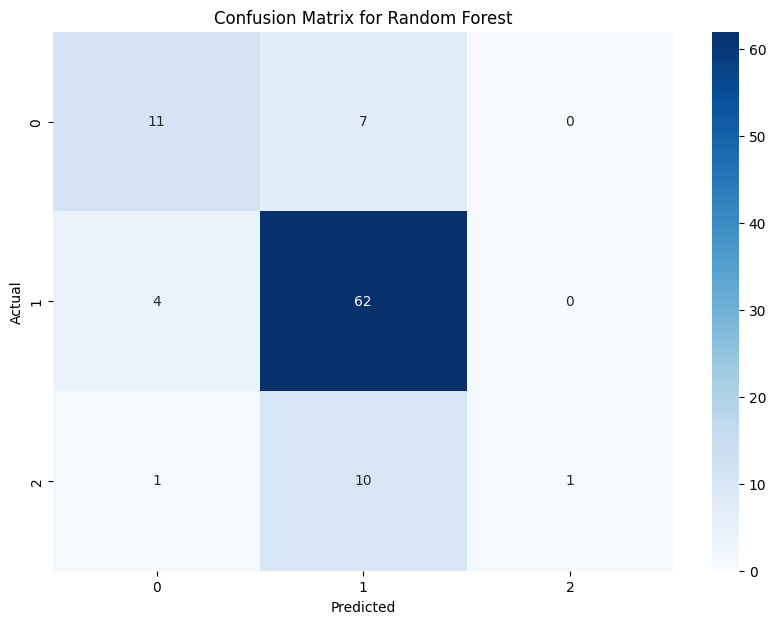

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(features, data['Difficulty_level'], train_size=0.8, random_state=RANDOM_STATE)  # 80% training and 20% testing

y_pred = random_forest_model.predict(X_test)


report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
#print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

################################################################################################################